In [114]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For text processing
from sklearn.feature_extraction.text import TfidfVectorizer
# For dimensionality reduction
from sklearn.decomposition import PCA
# For clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# For handling warnings
import warnings
warnings.filterwarnings('ignore')

In [116]:
column_n = ['news_id', 'category', 'subacategory', 'Title', 'Abstract', 'url', 'TitleEnt', 'AbstractEnt']
column_b = ['ImpressionId', 'user_id', 'timestamps', 'history', 'impressions']
news_df  = pd.read_csv('data/news.tsv', sep='\t', header=None, names=column_n)
behaviors_df= pd.read_csv('data/behaviors.tsv', sep='\t', header=None, names=column_b)

In [120]:
behaviors_df = behaviors_df.sample(frac=0.1, random_state=42)

In [122]:
# Fill NaN values in 'Title' and 'Abstract' with empty strings
news_df['Title'] = news_df['Title'].fillna('')
news_df['Abstract'] = news_df['Abstract'].fillna('')
behaviors_df['history'] = behaviors_df['history'].fillna('')

In [124]:
#Extract User Histories
# Split the 'history' string into a list of news_ids
behaviors_df['history_list'] = behaviors_df['history'].apply(lambda x: x.split(' ') if x != '' else [])


In [126]:
# Create a mapping from news_id to category
news_category_map = news_df.set_index('news_id')['category'].to_dict()

In [128]:
from tqdm import tqdm
from collections import Counter


# Initialize a list to store user-category interactions
user_category_data = []

# Iterate over each user's history
for idx, row in tqdm(behaviors_df.iterrows(), total=behaviors_df.shape[0]):
    user_id = row['user_id']
    history = row['history_list']
    categories = [news_category_map.get(news_id, 'Unknown') for news_id in history]
    category_counts = Counter(categories)
    category_counts['user_id'] = user_id
    user_category_data.append(category_counts)

# Create DataFrame
user_category_df = pd.DataFrame(user_category_data)
user_category_df = user_category_df.fillna(0)


100%|██████████| 1570/1570 [00:00<00:00, 6756.48it/s]


#### Preparing data for t-SNE

In [131]:
# Separate user_id from features
user_ids = user_category_df['user_id']
features = user_category_df.drop('user_id', axis=1)

In [133]:
# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [135]:
features_scaled

array([[ 0.71138665,  1.40418699,  1.60688868, ...,  0.17626997,
        -0.47184326, -0.04375484],
       [ 0.22380936, -0.43492813, -0.18139077, ..., -0.37832694,
        -0.47184326, -0.04375484],
       [-0.42629369, -0.1721974 , -0.4049257 , ..., -0.37832694,
         1.33938881, -0.04375484],
       ...,
       [-0.42629369, -0.43492813, -0.4049257 , ..., -0.37832694,
        -0.47184326, -0.04375484],
       [-0.42629369,  0.87872552,  0.2656791 , ..., -0.37832694,
         1.79219683, -0.04375484],
       [ 0.22380936,  0.35326406, -0.51669316, ...,  1.2854638 ,
         2.69781287, -0.04375484]])

In [137]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

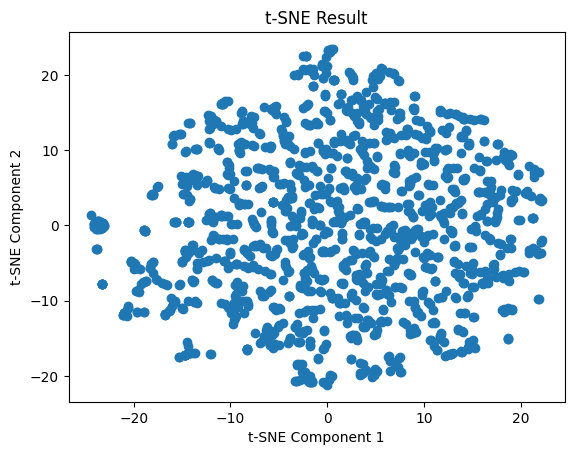

In [199]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(features_scaled )
# Plot the results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Result')
plt.show()

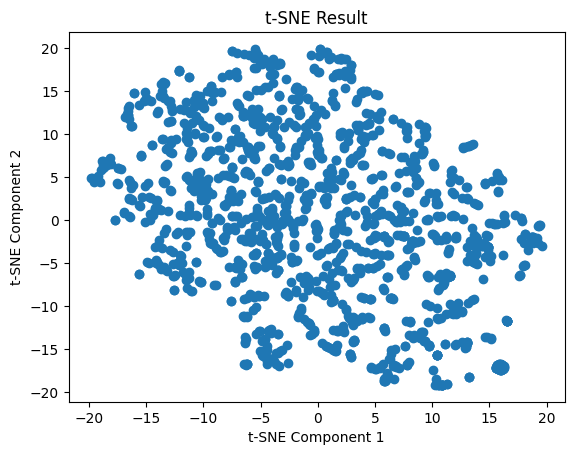

In [141]:
tsne = TSNE(n_components=2, perplexity=15, n_iter=300)
tsne_results = tsne.fit_transform(features_scaled )
# Plot the results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Result')
plt.show()

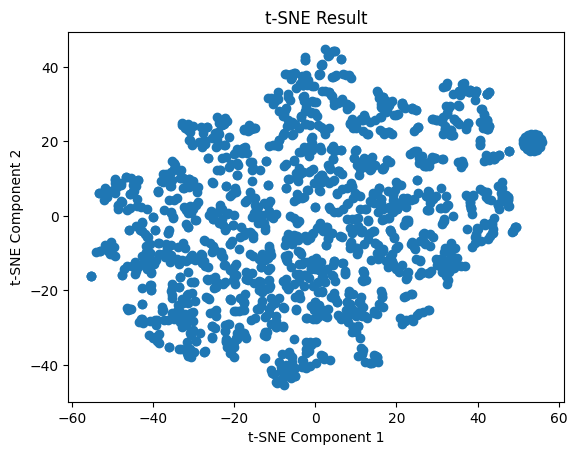

In [145]:
tsne = TSNE(n_components=2, perplexity=15, n_iter=500)
tsne_results = tsne.fit_transform(features_scaled )
# Plot the results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Result')
plt.show()

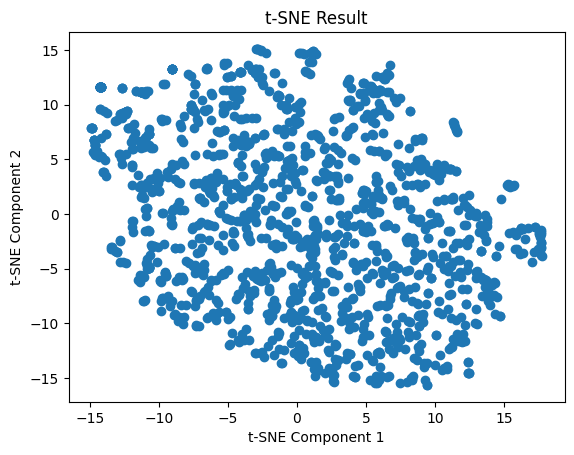

In [143]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(features_scaled )
# Plot the results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Result')
plt.show()

In [59]:
from sklearn.manifold import trustworthiness

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [77]:
perplexity_values = [5, 10, 15, 30, 50]

In [201]:
tsne_results

array([[11.938097  ,  0.7228113 ],
       [-6.9283414 , -8.6981125 ],
       [ 4.289412  , 10.940073  ],
       ...,
       [-9.855415  ,  0.15969193],
       [ 4.8045826 , 10.976208  ],
       [15.238172  ,  7.5828323 ]], dtype=float32)

In [204]:
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust n_clusters as needed
labels = kmeans.fit_predict(tsne_results)

# Add cluster labels to DataFrame (if needed for further analysis)
#umap_df_10['Cluster'] = umap_clusters_10

Perplexity: 5, Silhouette Score: 0.12276055663824081, KL Divergence: 1.2381374835968018
Perplexity: 10, Silhouette Score: 0.30311089754104614, KL Divergence: 1.3396458625793457
Perplexity: 15, Silhouette Score: 0.13501282036304474, KL Divergence: 1.372628927230835
Perplexity: 30, Silhouette Score: 0.07634305953979492, KL Divergence: 1.3467350006103516
Perplexity: 50, Silhouette Score: 0.08423604816198349, KL Divergence: 1.2471320629119873


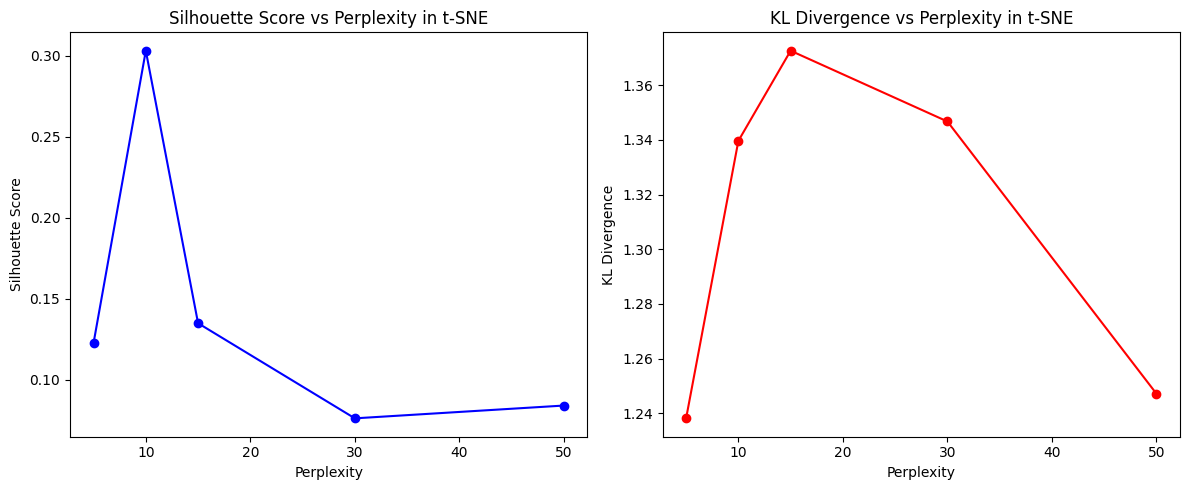

In [206]:
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import numpy as np

# Sample data (replace with your actual data)
data = features_scaled  # Example data with 100 samples and 50 features
#labels = np.random.randint(0, 3, 100)  # Example cluster labels (replace with your labels)

# List of perplexity values
perplexity_values = [5, 10, 15, 30, 50]

# Initialize lists to store results
silhouette_scores = []
kl_divergences = []

for perplexity in perplexity_values:
    # Apply t-SNE with the given perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_result = tsne.fit_transform(data)
    
    # Calculate Silhouette Score (only if labels are available)
    sil_score = silhouette_score(tsne_result, labels)
    silhouette_scores.append(sil_score)
    
    # Access the KL Divergence (Divergencia de Kullback-Leibler)
    kl_div = tsne.kl_divergence_
    kl_divergences.append(kl_div)

    print(f"Perplexity: {perplexity}, Silhouette Score: {sil_score}, KL Divergence: {kl_div}")

# Optionally, plot the results
import matplotlib.pyplot as plt

# Plot Silhouette Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(perplexity_values, silhouette_scores, 'bo-')
plt.xlabel('Perplexity')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Perplexity in t-SNE')

# Plot KL Divergence
plt.subplot(1, 2, 2)
plt.plot(perplexity_values, kl_divergences, 'ro-')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.title('KL Divergence vs Perplexity in t-SNE')

plt.tight_layout()
plt.show()


In [208]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

# Assuming original_data is your high-dimensional dataset
perplexity_values = [5, 10, 15, 30, 50]
n_neighbors = 10  # Number of neighbors to consider for neighborhood preservation
projected_data=tsne_result
original_data=features_scaled
def neighborhood_preservation(original_data, projected_data, n_neighbors):
    # Find neighbors in the original data
    nn_original = NearestNeighbors(n_neighbors=n_neighbors).fit(original_data)
    neighbors_original = nn_original.kneighbors(return_distance=False)
    
    # Find neighbors in the projected data
    nn_projected = NearestNeighbors(n_neighbors=n_neighbors).fit(projected_data)
    neighbors_projected = nn_projected.kneighbors(return_distance=False)
    
    # Calculate neighborhood preservation score
    preservation_scores = []
    for i in range(len(original_data)):
        # Count the intersection of neighbors
        intersection = np.intersect1d(neighbors_original[i], neighbors_projected[i])
        score = len(intersection) / n_neighbors
        preservation_scores.append(score)
    
    # Return the average neighborhood preservation score
    return np.mean(preservation_scores)

# Dictionary to store neighborhood preservation scores for each perplexity
preservation_scores = {}

# Loop through each perplexity value
for perplexity in perplexity_values:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_projection = tsne.fit_transform(original_data)
    
    # Calculate neighborhood preservation for this perplexity
    score = neighborhood_preservation(original_data, tsne_projection, n_neighbors)
    preservation_scores[perplexity] = score
    print(f"Perplexity: {perplexity}, Neighborhood Preservation Score: {score}")

# Output the preservation scores for each perplexity value
print("Neighborhood Preservation Scores by Perplexity:")
for perplexity, score in preservation_scores.items():
    print(f"Perplexity {perplexity}: {score}")


Perplexity: 5, Neighborhood Preservation Score: 0.43598726114649683
Perplexity: 10, Neighborhood Preservation Score: 0.46101910828025483
Perplexity: 15, Neighborhood Preservation Score: 0.46821656050955424
Perplexity: 30, Neighborhood Preservation Score: 0.47477707006369424
Perplexity: 50, Neighborhood Preservation Score: 0.46598726114649686
Neighborhood Preservation Scores by Perplexity:
Perplexity 5: 0.43598726114649683
Perplexity 10: 0.46101910828025483
Perplexity 15: 0.46821656050955424
Perplexity 30: 0.47477707006369424
Perplexity 50: 0.46598726114649686


Perplexity: 5, Neighborhood Preservation Score: 0.43598726114649683
Perplexity: 10, Neighborhood Preservation Score: 0.46101910828025483
Perplexity: 15, Neighborhood Preservation Score: 0.46821656050955424
Perplexity: 30, Neighborhood Preservation Score: 0.47477707006369424
Perplexity: 50, Neighborhood Preservation Score: 0.46598726114649686


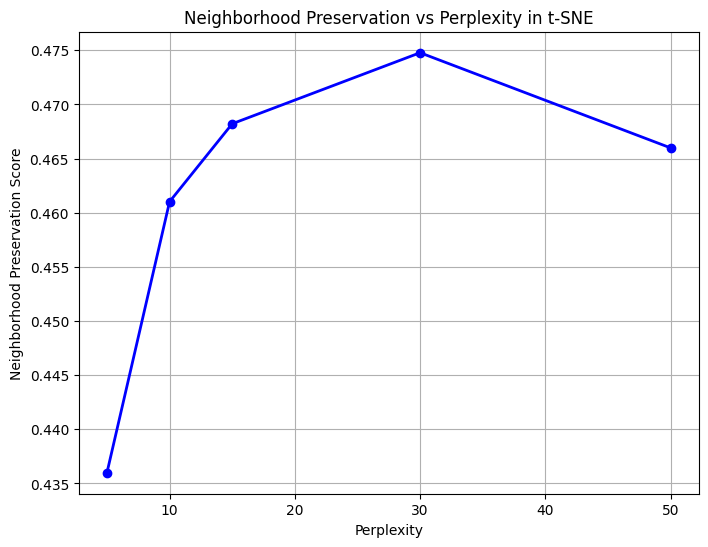

In [210]:
def neighborhood_preservation(original_data, projected_data, n_neighbors):
    # Find neighbors in the original data
    nn_original = NearestNeighbors(n_neighbors=n_neighbors).fit(original_data)
    neighbors_original = nn_original.kneighbors(return_distance=False)
    
    # Find neighbors in the projected data
    nn_projected = NearestNeighbors(n_neighbors=n_neighbors).fit(projected_data)
    neighbors_projected = nn_projected.kneighbors(return_distance=False)
    
    # Calculate neighborhood preservation score
    preservation_scores = []
    for i in range(len(original_data)):
        # Count the intersection of neighbors
        intersection = np.intersect1d(neighbors_original[i], neighbors_projected[i])
        score = len(intersection) / n_neighbors
        preservation_scores.append(score)
    
    # Return the average neighborhood preservation score
    return np.mean(preservation_scores)

# List to store neighborhood preservation scores for each perplexity
preservation_scores = []

# Loop through each perplexity value
for perplexity in perplexity_values:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_projection = tsne.fit_transform(original_data)
    
    # Calculate neighborhood preservation for this perplexity
    score = neighborhood_preservation(original_data, tsne_projection, n_neighbors)
    preservation_scores.append(score)
    print(f"Perplexity: {perplexity}, Neighborhood Preservation Score: {score}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(perplexity_values, preservation_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.xlabel("Perplexity")
plt.ylabel("Neighborhood Preservation Score")
plt.title("Neighborhood Preservation vs Perplexity in t-SNE")
plt.grid(True)
plt.show()